In [1]:
#importes

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer

In [2]:
df_train = pd.read_csv("train.csv")

In [3]:
df_train.columns

Index(['Id', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104805 entries, 0 to 104804
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Id                                    104805 non-null  int64  
 1   SeriousDlqin2yrs                      104805 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  104805 non-null  float64
 3   age                                   104805 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  104805 non-null  int64  
 5   DebtRatio                             104805 non-null  float64
 6   MonthlyIncome                         84024 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       104805 non-null  int64  
 8   NumberOfTimes90DaysLate               104805 non-null  int64  
 9   NumberRealEstateLoansOrLines          104805 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  104805 non-null  int64  
 11  

In [5]:
df_train_corr = df_train.corr()

<AxesSubplot:>

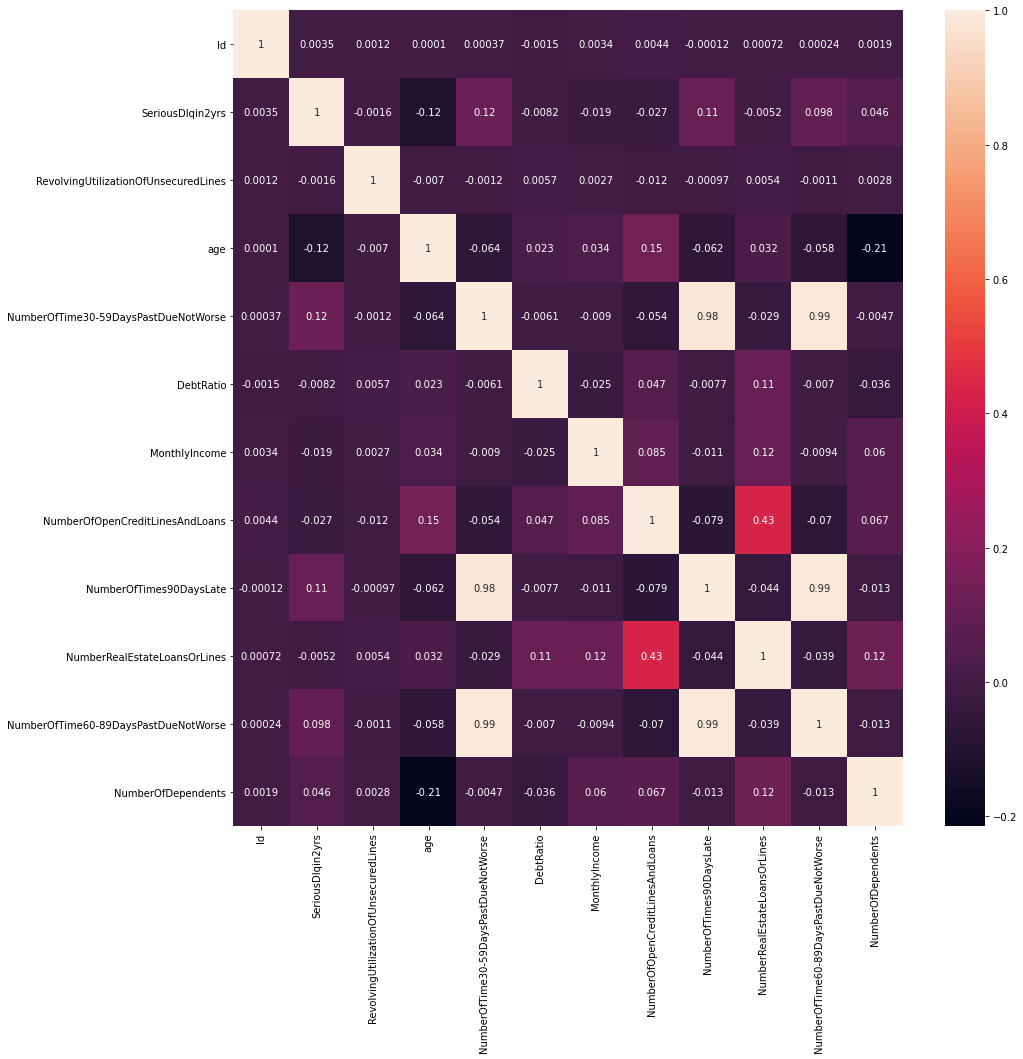

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train_corr, annot=True)

In [8]:
imputer = KNNImputer(n_neighbors=3)
imputer.fit(df_train[['Id', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']])
df_train[['Id', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']] = imputer.transform(df_train[['Id', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']])

C:\Users\artur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

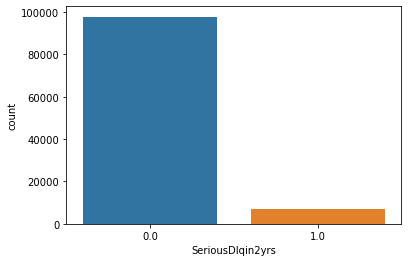

In [9]:
sns.countplot(df_train['SeriousDlqin2yrs'])

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104805 entries, 0 to 104804
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Id                                    104805 non-null  float64
 1   SeriousDlqin2yrs                      104805 non-null  float64
 2   RevolvingUtilizationOfUnsecuredLines  104805 non-null  float64
 3   age                                   104805 non-null  float64
 4   NumberOfTime30-59DaysPastDueNotWorse  104805 non-null  float64
 5   DebtRatio                             104805 non-null  float64
 6   MonthlyIncome                         104805 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       104805 non-null  float64
 8   NumberOfTimes90DaysLate               104805 non-null  float64
 9   NumberRealEstateLoansOrLines          104805 non-null  float64
 10  NumberOfTime60-89DaysPastDueNotWorse  104805 non-null  float64
 11  

In [11]:
X_train = df_train.drop('SeriousDlqin2yrs', axis=1)
y_train = df_train['SeriousDlqin2yrs']

In [12]:
y_train

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
104800    0.0
104801    0.0
104802    0.0
104803    0.0
104804    0.0
Name: SeriousDlqin2yrs, Length: 104805, dtype: float64

In [13]:
# KNN
grid_neighbors = {"n_neighbors": [3,5,7,9,11],       # Pares acepta sklearn, pero se suele poner impares, por los empates
                  "weights": ["uniform","distance"]  # Ponderar o no las clasificaciones en 
                                                     # función de la inversa de la distancia a cada vecino
                  }

# ARBOL DE DECISION
grid_arbol = {"max_depth":list(range(1,10)) # Profundidades del árbol. Cuanto más profundo, mas posibilidades de overfitting,
                                            # pero  mas preciso en entrenamiento.
              }


# RANDOM FOREST
grid_random_forest = {"n_estimators": [120], # El Random Forest no suele empeorar por exceso de
                                             # estimadores. A partir de cierto numero no merece la pena
                                             # perder el tiempo ya que no mejora mucho más la precisión.
                                             # Entre 100 y 200 es una buena cifra

                     
                     "max_depth": [3,4,5,6,10,15,17], # No le afecta tanto el overfitting como al decissiontree.
                                                      # Podemos probar mayores profundidades
                      
                     "max_features": ["sqrt", 3, 4] # Numero de features que utiliza en cada split.
                                                    # cuanto más bajo, mejor generalizará y menos overfitting.
                                                    
                     }


# GRADIENT BOOSTING
grid_gradient_boosting = {"loss": ["deviance"], # Deviance suele ir mejor.
                          "learning_rate": [0.05, 0.1, 0.2, 0.4, 0.5],  # Cuanto más alto, mas aporta cada nuevo arbol
                          
                          "n_estimators": [20,50,100,200], # Cuidado con poner muchos estiamdores ya que vamos a
                                                           # sobreajustar el modelo
                          
                          "max_depth": [1,2,3,4,5], # No es necesario poner una profundiad muy alta. Cada nuevo
                                                    # arbol va corrigiendo el error de los anteriores.
                          
                          
                          "max_features": ["sqrt", 3, 4], # Igual que en el random forest
                          }



In [14]:
# Si solo es el modelo, no hará falta meterlo en un pipeline
rand_forest = RandomForestClassifier()


'''
Para iterar hiperparámetros de varios elementos del pipeline, le ponemos un nombre
a cada elemento en el pipeline, por ejemplo 'selectkbest' y 'svm', para luego en el
grid de hiperparametros identificar sus respectivos parametros mediante el nombre
que le hayamos puesto en el pipeline, dos guines bajos y el nombre del hiperparámetro.
'''

grid_random_forest = {"n_estimators": [120],
                     "max_depth": [3,4,5,6,10,15,17],
                     "max_features": ["sqrt", 3, 4]                          
                     }

In [16]:
# Almaceno en una lista de tuplas los modelos (nombre que le pongo, el modelo, hiperparametros)
models = [('rand_forest', rand_forest, grid_random_forest)]
        
# Declaro en un diccionario los pipelines e hiperparametros
models_gridsearch = {}

for i in models:
    models_gridsearch[i[0]] = GridSearchCV(i[1],
                                          i[2],
                                          cv = 10,
                                          verbose =1,
                                          scoring='roc_auc',
                                          n_jobs = -1)
    
    models_gridsearch[i[0]].fit(X_train, y_train)

Fitting 10 folds for each of 21 candidates, totalling 210 fits


In [17]:
best_grids = [(i, j.best_score_) for i, j in models_gridsearch.items()]

best_grids = pd.DataFrame(best_grids, columns=['Grid', 'Best Score']).sort_values(by='Best Score', ascending=False)
best_grids

,Grid,Best Score
0,rand_forest,0.851825


In [21]:
df_test = pd.read_csv('test.csv')
df_test

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,9,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,17,0.166284,53,0,0.188274,8800.0,7,0,0,0,0.0
3,18,0.221813,43,0,0.527888,3280.0,7,0,1,0,2.0
4,24,0.046560,58,0,0.241622,2416.0,9,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
45190,149992,0.871976,50,0,4132.000000,NaN,11,0,1,0,3.0
45191,149994,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
45192,149995,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
45193,149996,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0


In [23]:
imputer = KNNImputer(n_neighbors=3)
imputer.fit(df_test[['Id', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']])
df_test[['Id', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']] = imputer.transform(df_test[['Id', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']])

In [31]:
models_gridsearch['rand_forest'].best_estimator_.feature_importances_

array([1.66733678e-04, 1.94554841e-01, 1.72741557e-02, 1.39576436e-01,
       4.21552309e-03, 1.66382064e-03, 8.32713041e-03, 3.69208900e-01,
       3.29203755e-03, 2.61129760e-01, 5.90662672e-04])

In [24]:
predictions_proba = models_gridsearch['rand_forest'].predict_proba(df_test)

In [27]:
df_submission = df_test[['Id']]

df_submission['Id'] = df_submission['Id'].astype(int)

df_submission['SeriousDlqin2yrs'] = predictions_proba[:, -1]

df_submission.to_csv('submission.csv', index=False)

<ipython-input-27-d54ed23727cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_submission['Id'] = df_submission['Id'].astype(int)
<ipython-input-27-d54ed23727cc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_submission['SeriousDlqin2yrs'] = predictions_proba[:, -1]


In [ ]:
df_submission